# Assignment11

## Name : ChoiBowon
## StudentID : 20155212
## GitHub : https://github.com/ChoiBowon/Assignment

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy import sparse
from skimage import io, color
from skimage import exposure

## File input 

In [ ]:
file_image	= 'cau.png'

# im : 원본 이미지를 그레이 스케일로
# im_noise : 노이즈 낀 이미지 
# im_recon : im 인데, reconstruction 이미지(denoised image)로 바껴야할거임!!!!!
# noise_recon : im_noise - im_recon(im) 
# error 는 im - im_recon임.

im_color 	= io.imread(file_image)
im_gray  	= color.rgb2gray(im_color)
im          = (im_gray - np.mean(im_gray)) / np.std(im_gray)
im = im[0:im.shape[0], 0:im.shape[1]]
(row, col)  = im.shape



# obtain the reconstructed (denoised) images with varying degrees of regularization 

#im_recon    = im # this must be replaced with the reconstructed (denoised) image 
#noise_recon = im_noise - im_recon
#error       = np.linalg.norm(im - im_recon)



## Transfer image to vector 

In [ ]:
def transfer(im_noise):
    (height, width) = im_noise.shape
    im_noise_vec = np.empty(height*width)
    for i in range(width):
        im_noise_vec[i*height:(i+1)*height] = im_noise[:,i]
    
    return im_noise_vec

## Define Deviation_X function

In [93]:
def deviation_x(shape):
    deviation_x = np.zeros(((shape[0]-1) * shape[1], shape[0] * shape[1]))
    
    for i in range(shape[1]):
        for j in range(shape[0]-1):
            deviation_x[i*(shape[0]-1)+j, i*shape[0]+j] = -1
            deviation_x[i*(shape[0]-1)+j, i*shape[0]+j+1] = 1
            
    return sparse.csr_matrix(deviation_x)


## Define Deviation_Y function

In [94]:
def deviation_y(shape):
    deviation_y = np.zeros((shape[0] * (shape[1]-1), shape[0] * shape[1]))
    
    for i in range(shape[1] - 1):
        for j in range(shape[0]):
            deviation_y[i*shape[0]+j, i*shape[0]+j] = -1
            deviation_y[i*shape[0]+j, (i+1)*shape[0]+j] = 1
    
    return sparse.csr_matrix(deviation_y)

## Define least_square_problem function

In [95]:
def least_square_problem(lamb, im_noise):
    im_noise_vec = transfer(im_noise)
    dx, dy = deviation_x(im_noise.shape), deviation_y(im_noise.shape)
    
    A = sparse.eye(len(im_noise_vec))
    A = sparse.vstack([A, np.sqrt(lamb)*dx, np.sqrt(lamb)*dy])
    
    b = np.zeros(len(im_noise_vec) + dx.shape[0] + dy.shape[0])
    b[:len(im_noise_vec)] = im_noise_vec
    
    return A,b

## Define function for reconstruction image

In [96]:
def reconstruction(lamb, im_noise):
    A, b = least_square_problem(l, im_noise)
    sol, _, _, _, _, _, _, _, _, _ = sparse.linalg.lsqr(A, b)
    im_recon = np.empty(im.shape)
    for i in range(im.shape[1]):
        im_recon[:, i] = sol[im.shape[0]*i:im.shape[0]*(i+1)]
    
    return im_recon

noise_std = 0.2 lambda = 0.125
error =  23.776364804245528


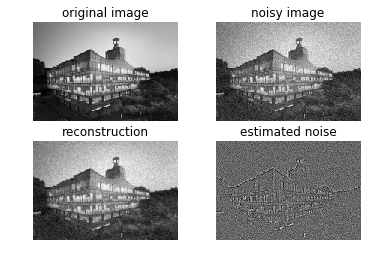

noise_std = 0.2 lambda = 0.25
error =  22.387907209814898


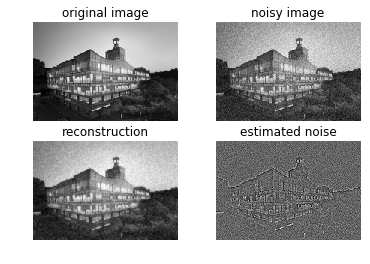

noise_std = 0.2 lambda = 0.5
error =  23.730695015021016


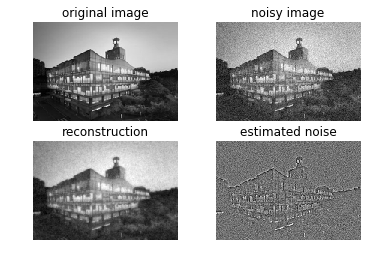

noise_std = 0.2 lambda = 1
error =  28.024521848525843


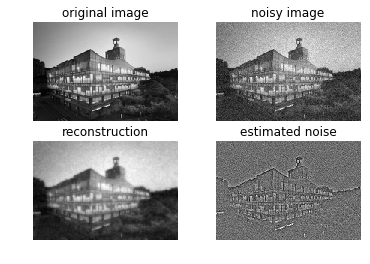

noise_std = 0.2 lambda = 2
error =  33.99260895691776


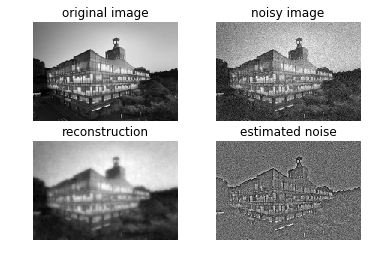

noise_std = 0.2 lambda = 4
error =  40.44506125869757


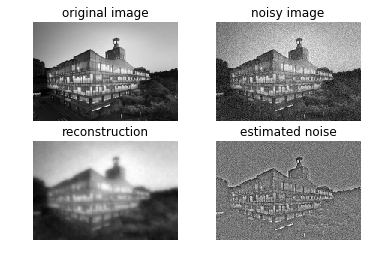

noise_std = 0.2 lambda = 8
error =  46.957993038541844


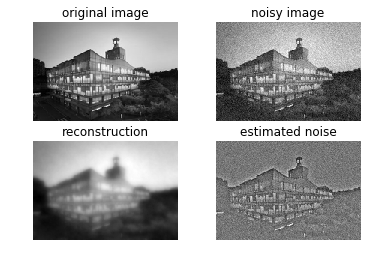

noise_std = 0.4 lambda = 0.125
error =  45.01729798577633


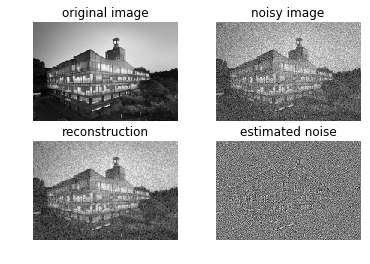

noise_std = 0.4 lambda = 0.25
error =  38.17923209966897


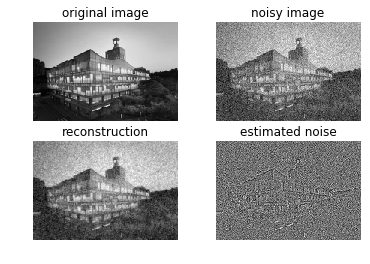

noise_std = 0.4 lambda = 0.5
error =  33.16822565885946


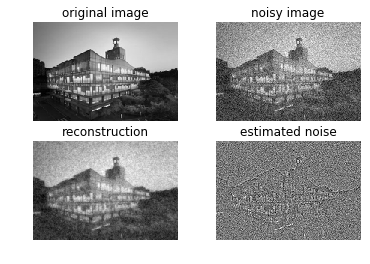

noise_std = 0.4 lambda = 1
error =  32.84136948498753


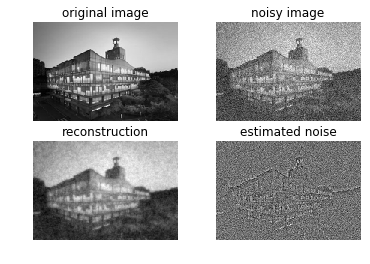

noise_std = 0.4 lambda = 2
error =  36.17210724444731


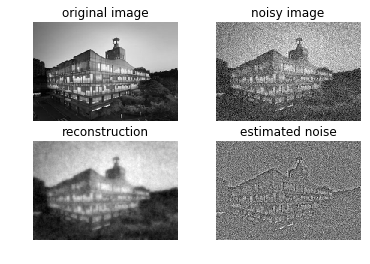

noise_std = 0.4 lambda = 4
error =  41.591131287740424


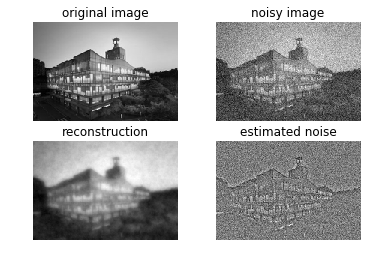

noise_std = 0.4 lambda = 8
error =  47.24124051068839


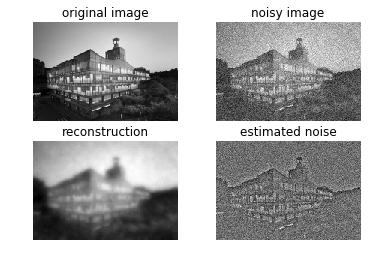

noise_std = 0.8 lambda = 0.125
error =  89.40093450122532


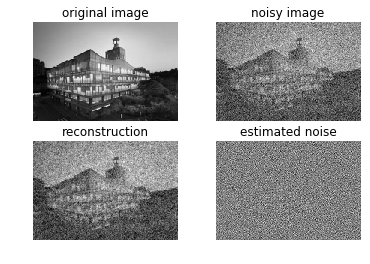

noise_std = 0.8 lambda = 0.25
error =  72.7915767347094


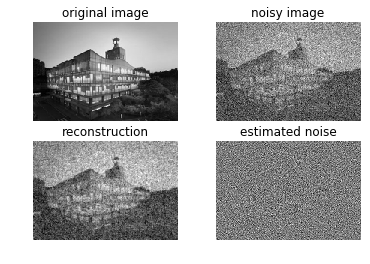

noise_std = 0.8 lambda = 0.5
error =  57.23191391725615


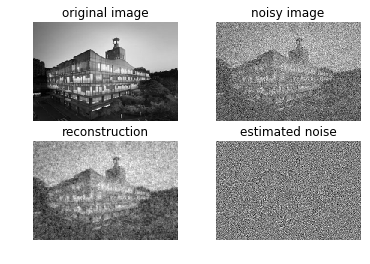

noise_std = 0.8 lambda = 1
error =  46.81163124728616


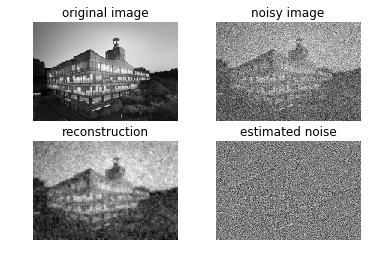

noise_std = 0.8 lambda = 2
error =  42.90560179646062


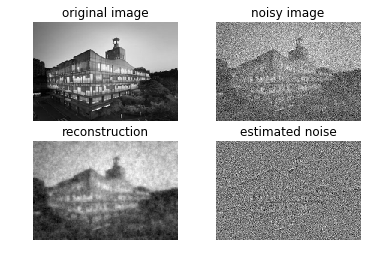

noise_std = 0.8 lambda = 4
error =  44.758754123847986


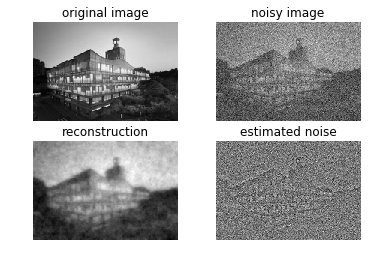

noise_std = 0.8 lambda = 8
error =  48.71116464635873


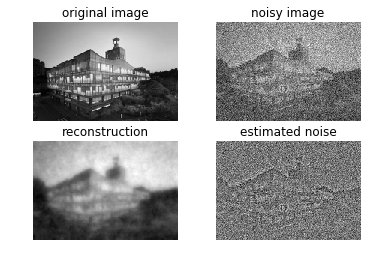

noise_std = 1 lambda = 0.125
error =  111.78870796158022


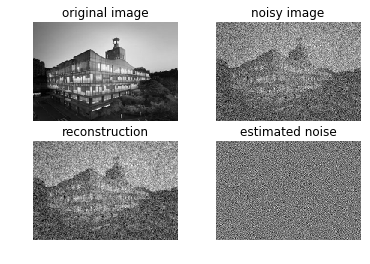

noise_std = 1 lambda = 0.25
error =  90.2615350942122


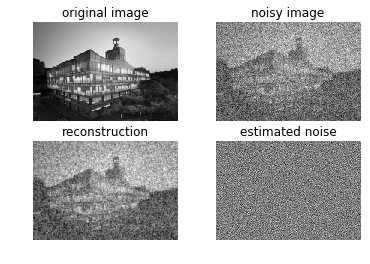

noise_std = 1 lambda = 0.5
error =  70.75239902482079


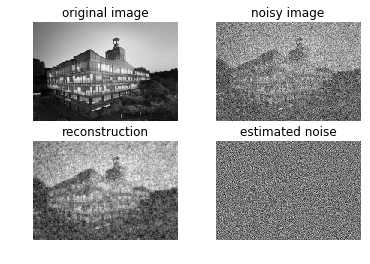

noise_std = 1 lambda = 1
error =  55.47425995446462


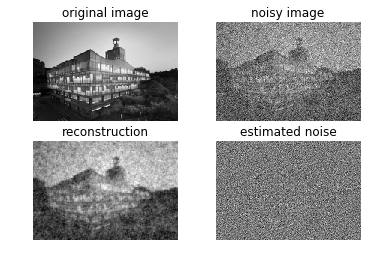

noise_std = 1 lambda = 2
error =  47.89673748691033


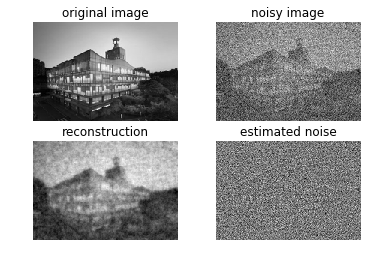

noise_std = 1 lambda = 4
error =  46.70265503075038


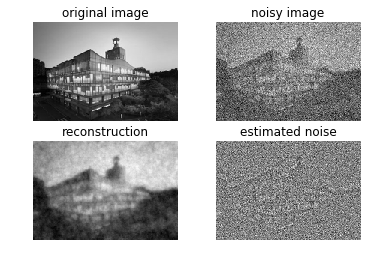

noise_std = 1 lambda = 8
error =  49.928402331457825


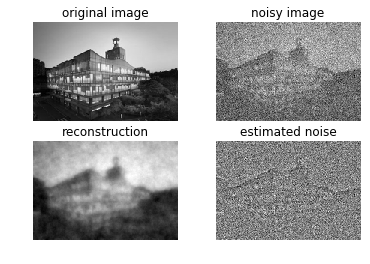

In [97]:
for s in [0.2, 0.4, 0.8, 1]:
    for l in [2**(-3), 2**(-2), 2**(-1), 2**0, 2**1, 2**2, 2**3]:
        print("noise_std =",s, "lambda =", l)
        
        noise_std   = s # try with varying noise standard deviation
        noise       = np.random.normal(0, noise_std, (row, col))
        im_noise    = im + noise
        
        im_recon = reconstruction(l, im_noise)
        noise_recon = im_noise - im_recon
        error = np.linalg.norm(im - im_recon)
        print("error = ", error)
        
        #plot_img(im, im_noise, im_recon, noise_recon)
        p1 = plt.subplot(2,2,1)
        p1.set_title('original image')
        plt.imshow(im, cmap='gray')
        plt.axis('off')
        
        p2 = plt.subplot(2,2,2)
        p2.set_title('noisy image')
        plt.imshow(im_noise, cmap='gray')
        plt.axis('off')
        
        p3 = plt.subplot(2,2,3)
        p3.set_title('reconstruction')
        plt.imshow(im_recon, cmap='gray')
        plt.axis('off')
        
        p4 = plt.subplot(2,2,4)
        p4.set_title('estimated noise')
        plt.imshow(noise_recon, cmap='gray')
        plt.axis('off')
        
        plt.show()